### BIKE SHARING ASSIGNMENT

#### Problem Statement: Increase the demand and hence the business of bike sharing by using 'cnt' as the target variable and predict using other features given in the dataset the demand and thevariables most impacting this and by how much

#### We will use linear regression to make our model and see those relationships amongst variables

In [577]:
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [578]:
# Filtering out warnings  

import warnings
warnings.filterwarnings('ignore')

In [579]:
# Reading input files and storing them in dataframes

df= pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Few things to understand before we proceed forward, casual and registered users add on to become the cnt variable which is our target variable, now by this we now casual and regustered are always going to be directly related to the target variable, hence we will ignore them for our analysis as we are going to use cnt only

#### Another thing to verify is that weathersit as described in the data dictionary is a combination of temp, atemp, hum, windspeed, so it would be worth while to check the linearty between these and see if we can ignore any of these in our analysis so that we don't double count

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### From the data dictionary we see there are multiple categorical variables which are int64 as seen above so lets perform some data preparation to change them into strings

#### We would follow the below naming convestions to convert the numerical variables to categorical variables

season : season (1:spring, 2:summer, 3:fall, 4:winter
yr : year (0: 2018, 1:2019)
mnth : month ( 1 to 12)
holiday : Yes/No
weekday : day of the week
workingday : Yes/No
weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy - Weather1
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist- Weather2
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds- Weather3
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog- Weather4

In [581]:
# Writing map functions to change all these conventions of season variable

dict_season = {1:'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

res = map(lambda x: dict_season[x], df['season'])
df.season = list(res)




In [582]:

df.head()
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [583]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [584]:
# changing mnth

month_dict= {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df['mnth'] = list(map(lambda x : month_dict[x], df['mnth']))

df['mnth'].value_counts()



Jul    62
Mar    62
Dec    62
May    62
Oct    62
Aug    62
Jan    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [585]:
# changing year 

yr_dict= {1:'2019', 0:'2018'}

df['yr'] = list(map(lambda x : yr_dict[x], df['yr']))

df['yr'].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [586]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [587]:
yes_no_dict= {1:'Yes', 0:'No'}

df['holiday'] = list(map(lambda x : yes_no_dict[x], df['holiday']))
df['workingday'] = list(map(lambda x : yes_no_dict[x], df['workingday']))

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,No,1,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,No,2,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,No,3,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,No,4,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,No,5,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [588]:
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [589]:
weekday_dict= {1:'Monday', 2:'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

df['weekday'] = list(map(lambda x : weekday_dict[x], df['weekday']))

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,No,Monday,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,No,Tuesday,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,No,Wednesday,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,No,Thursday,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,No,Friday,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [590]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [591]:
weathersit_dict= {1:'Weather1', 2:'Weather2', 3: 'Weather3', 4: 'Weather4'}

df['weathersit'] = list(map(lambda x : weathersit_dict[x], df['weathersit']))

df.weathersit.value_counts()

Weather1    463
Weather2    246
Weather3     21
Name: weathersit, dtype: int64

In [592]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,No,Monday,Yes,Weather2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,No,Tuesday,Yes,Weather2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,No,Wednesday,Yes,Weather1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,No,Thursday,Yes,Weather1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,No,Friday,Yes,Weather1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


#### Now that we have changed the categorical variables to thair actual form lets divide the dataset into numerical and categorical variables so that we can do some EDA over them

In [594]:
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
numerical = ['temp','atemp','hum','windspeed','cnt']


##### Categorical Variables EDA

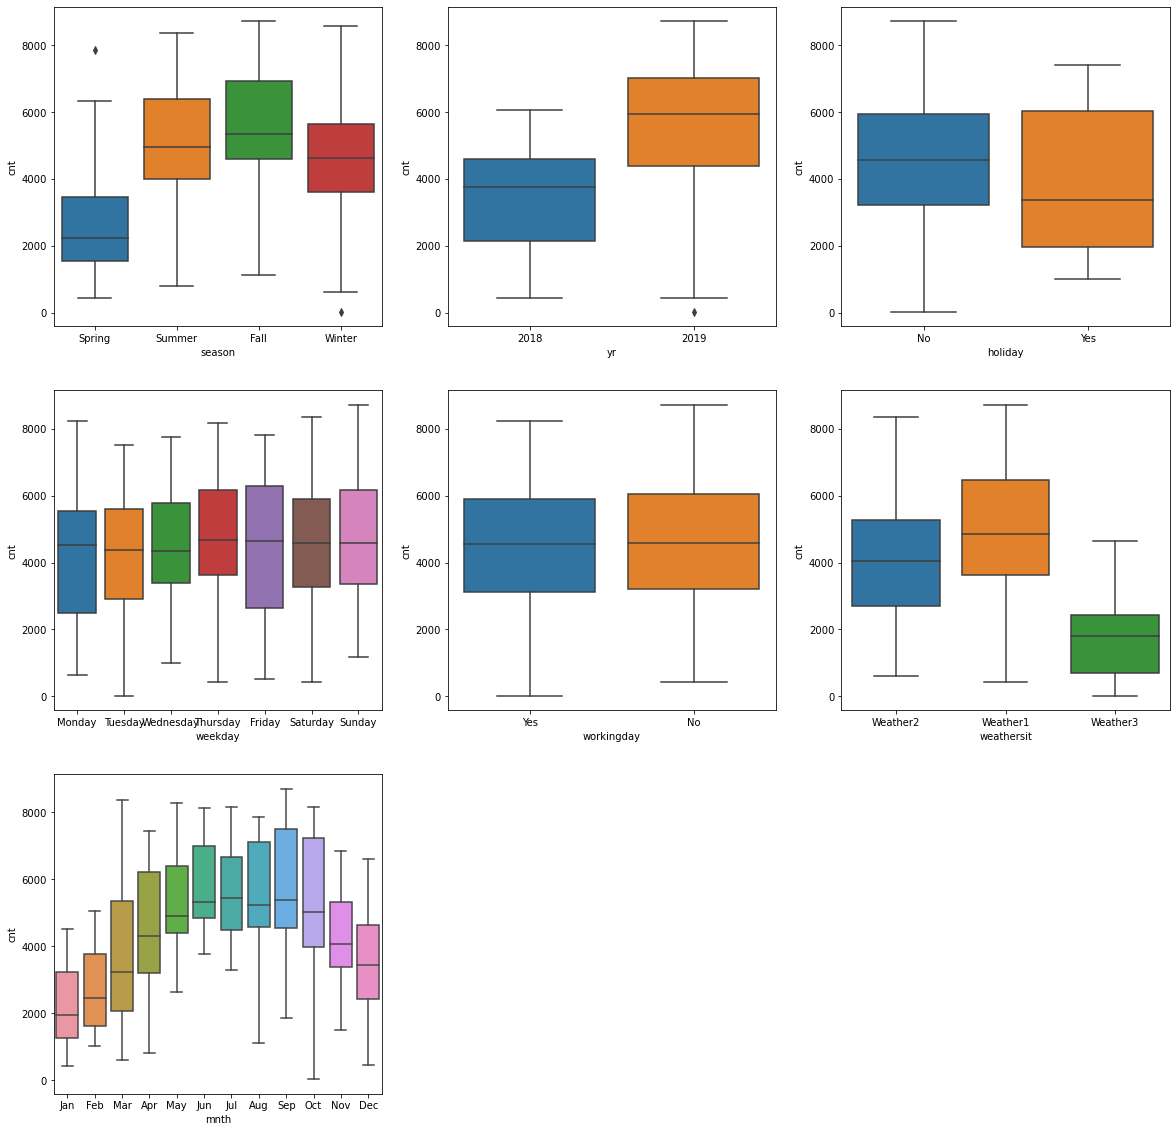

In [595]:
# Plotting box plots to erive insights on how these categorical variables inpact cnt
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(332)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(333)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(334)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(335)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(336)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(337)
sns.boxplot(x='mnth',y='cnt',data=df)


#### Inferences from the above

1. Bike rentals are highest in the fall season and least in the spring season
2. 2019 demand was higher than 2018 demand, this means there is scope for business to grow in the coming years
3. The median of demand numbers when there isn't a holiday is higher than the when it is a holiday, this could be attributed to the fact that people might use bike rentals for office commute
4. Not a lot of difference in the weekdays when the bike is hired
5. Bike rental demand is the highest for weather 1 which is Clear, Few clouds, Partly cloudy, Partly cloudy
6. From the box plots of Months against demand, we see the fall months of Aug, Sep, Oct have the highest demand

#### Numerical Columns EDA

###### Lets see the correlations between the munerical data by plotting pair plots, this would tell us whether the variables are multi-collinear etc which would help us ahead in the modelling piece, but the aim is to find any relationships between these variables

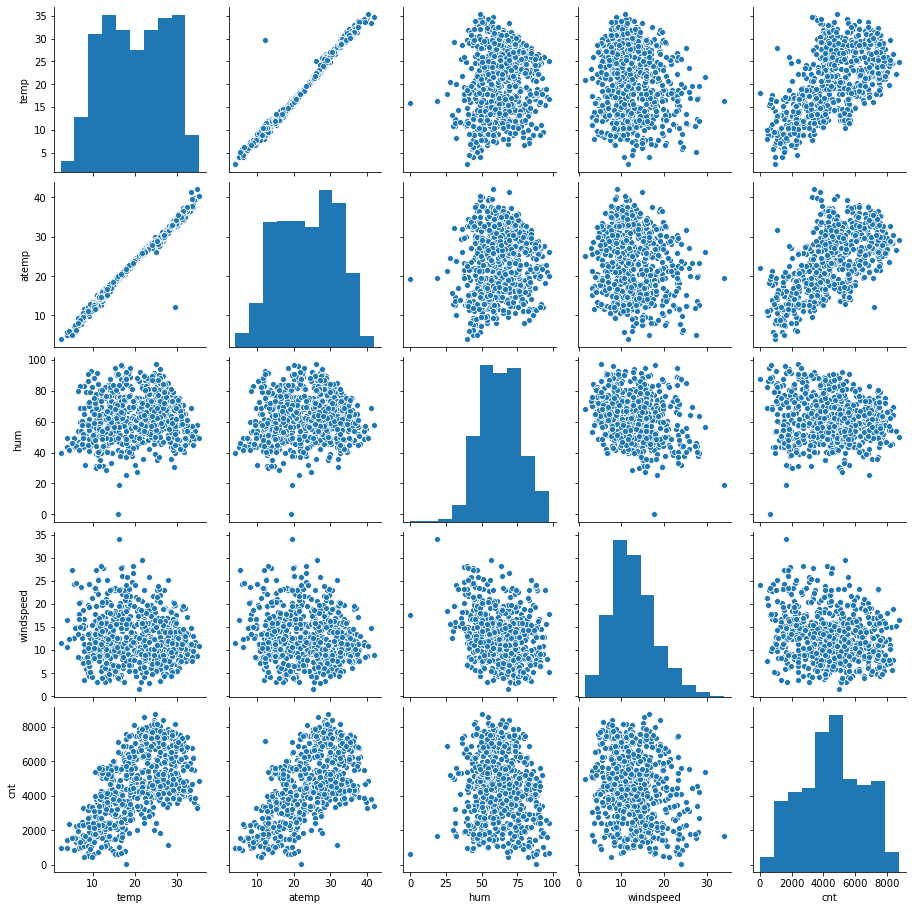

In [596]:
sns.pairplot(df[numerical])
plt.show()

In [597]:
corr = df[numerical].corr()
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


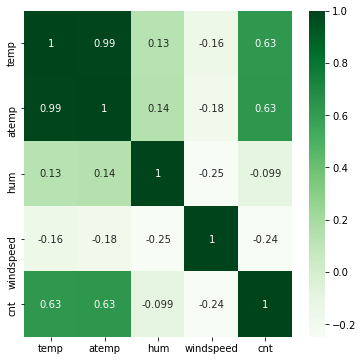

In [598]:
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True, cmap = 'Greens')

#### Inferences:

The above 3 things literraly show correlation between variables in different forms- 

1. What we infer from the heatmap is that temp and atemp are highly correlated, so we should use either one for modelling
2. Temp is the highest correated variable to cnt and hum is the lowest corralated variable to cnt

##### Now we look ahead at the data and create dummy variables and scale the numerical variables so we can do the modelling

In [599]:
#Dummy variables creation

df_dummies = pd.get_dummies(df[categorical], drop_first=True)
df_dummies.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [600]:
# Creating final dataframe on which we need to do the modelling by dropping the columns which are not requied

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [601]:
drop = ['instant', 'dteday', 'season', 'yr','mnth', 'holiday','weekday','workingday','weathersit','casual','registered']

df1 = df.drop(drop, axis = 1)

df1.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600



##### Now we will also remove atemp, because we atemp and temp are almost perfectly co-related and hence we can use one of these for our analysis further

In [602]:
df1.drop('atemp', axis = 1, inplace = True)
df1.head()

,temp,hum,windspeed,cnt
0,14.110847,80.5833,10.749882,985
1,14.902598,69.6087,16.652113,801
2,8.050924,43.7273,16.636703,1349
3,8.200000,59.0435,10.739832,1562
4,9.305237,43.6957,12.522300,1600


In [603]:
# Now we concat our df1 to dummy variabes 
df1 = pd.concat([df1, df_dummies],axis=1)

df1.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Next step is to divide the dataset to test train sets post which we will scale the numerical variables using min max scaler

In [604]:
y = df1['cnt']
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [605]:
X= df1.drop('cnt', axis = 1)
X.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
0,14.110847,80.5833,10.749882,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,8.050924,43.7273,16.636703,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [606]:
#Splitting to test train set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=150)

X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
602,26.786653,84.5833,15.333486,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
660,22.310847,64.1667,6.334569,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
262,23.028347,88.1250,9.041918,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
93,23.506653,42.6250,25.833257,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
510,28.392500,73.2500,13.332464,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [607]:
#Scaling the numerical variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

var = ['temp', 'hum', 'windspeed']
X_train[var] = scaler.fit_transform(X_train[var])

X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
602,0.740406,0.878788,0.425641,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
660,0.604379,0.666667,0.148749,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
262,0.626185,0.915584,0.232053,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
93,0.640722,0.442857,0.748713,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
510,0.789210,0.761039,0.364071,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


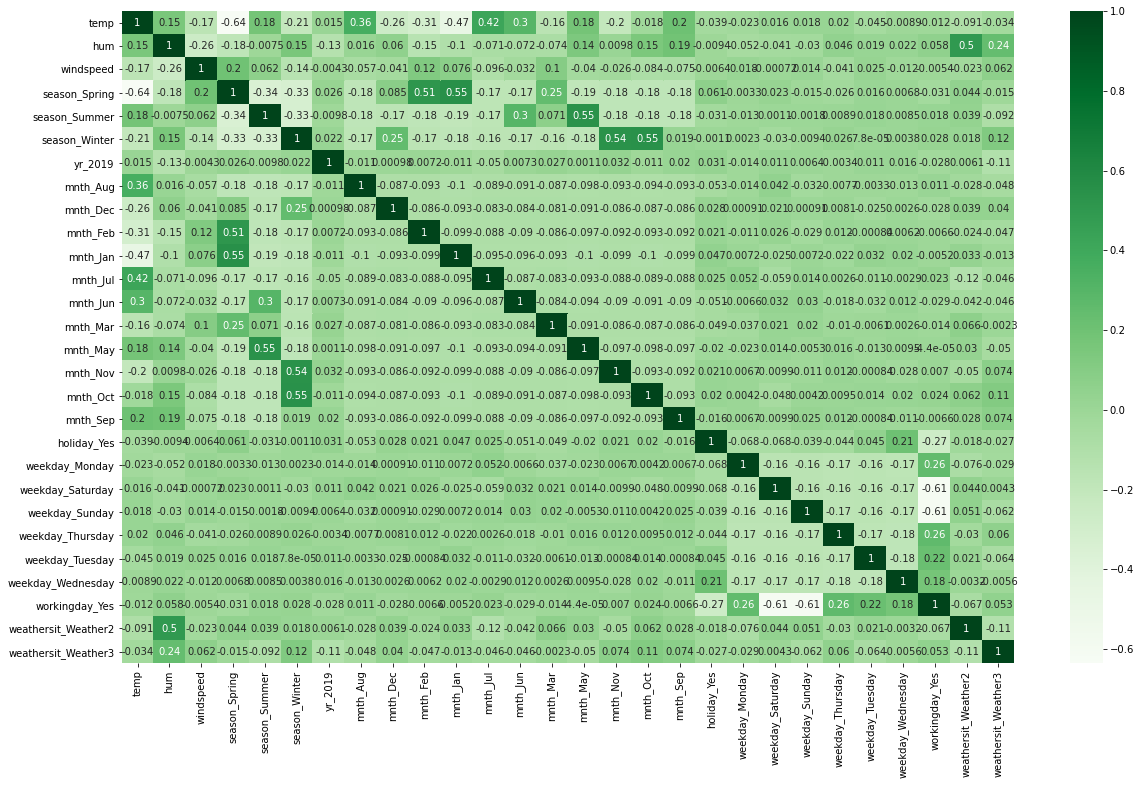

In [608]:
#Plotting correlation between all numerical variables

plt.figure(figsize =(20,12))
sns.heatmap(X_train.corr(), annot = True, cmap = 'Greens')
plt.show()

#### The main aim of the above was to find if there are some particular variables which have high correlation between numerical variables to check for any collinearilty which could be used to remove a few variables

#### But since any such relations were not visible we will use all the variables and reduce them one by one based on manual inspection

In [609]:
#Build a model with all variables

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     108.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.14e-204
Time:                        21:56:59   Log-Likelihood:                -4699.6
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     555   BIC:                             9584.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3407.2488    914.853      3.724      0.000    1610.252    5204.246
temp                 3621.4205    373.034      9.708      0.000    2888.689    4354.152
hum                 -1357.0457    317.280     -4.277      0.000   -1980.263    -733.829
windspeed           -1359.0199    221.088     -6.147      0.000   -1793.291    -924.749
season_Spring        -644.7352    248.263     -2.597      0.010   -1132.385    -157.085
season_Summer          70.3012    217.452      0.323      0.747    -356.827     497.430
season_Winter         932.4049    217.376      4.289      0.000     505.425    1359.385
yr_2019              2000.2510     66.362     30.142      0.000    1869.900    2130.602
mnth_Aug              -92.2104    278.585     -0.331      0.741    -639.419     454.999
mnth_Dec             -650.6721    284.246     -2.289      0.022   -1209.002     -92.343
mnth_Feb             -505.3341    279.575     -1.808      0.071   -1054.488      43.820
mnth_Jan             -689.3443    290.225     -2.375      0.018   -1259.418    -119.271
mnth_Jul             -477.6961    288.611     -1.655      0.098   -1044.600      89.207
mnth_Jun                1.7045    195.067      0.009      0.993    -381.455     384.864
mnth_Mar             -105.2033    217.954     -0.483      0.630    -533.318     322.912
mnth_May              233.8740    168.084      1.391      0.165     -96.285     564.033
mnth_Nov             -735.8359    305.284     -2.410      0.016   -1335.488    -136.183
mnth_Oct             -105.2720    298.430     -0.353      0.724    -691.462     480.918
mnth_Sep              447.6077    263.482      1.699      0.090     -69.936     965.151
holiday_Yes          -637.7938    792.352     -0.805      0.421   -2194.169     918.581
weekday_Monday       -211.2981    122.390     -1.726      0.085    -451.703      29.107
weekday_Saturday     -100.7455    827.183     -0.122      0.903   -1725.538    1524.047
weekday_Sunday         55.4027    817.399      0.068      0.946   -1550.172    1660.978
weekday_Thursday       57.3986    118.414      0.485      0.628    -175.195     289.993
weekday_Tuesday      -212.8866    120.592     -1.765      0.078    -449.759      23.986
weekday_Wednesday     -71.8838    119.123     -0.603      0.546    -305.871     162.104
workingday_Yes       -137.0393    819.563     -0.167      0.867   -1746.863    1472.785
weathersit_Weather2  -425.5162     86.759     -4.905      0.000    -595.933    -255.100
weathersit_Weather3 -1816.1477    235.560     -7.710      0.000   -2278.847   -1353.449
==============================================================================
Omnibus:                       90.883   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.717
Skew:                         

#### Now based on this model we see there are a lot of variables which a very high P value, this means these variables are insignificant in our model calculation, we need to remove them. 

##### But we also know that VIF is another method to check how clearly the predictors are inter-related and using a combination of p value and VIF we will reduce the number of predictors used and make our model most accurate without over fitting it

In [610]:
# Calculating VIFs to get a good view of what variables to drop

from statsmodels.stats.outliers_influence import variance_inflation_factor


def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [611]:
vif = checkVIF(X_train)
vif

,Features,VIF
25,workingday_Yes,79.09
0,temp,44.00
1,hum,42.53
21,weekday_Sunday,15.11
20,weekday_Saturday,15.11
3,season_Spring,14.99
4,season_Summer,10.90
5,season_Winter,10.84
10,mnth_Jan,7.28
15,mnth_Nov,7.03


In [612]:
# We define a function for building model so that we can call this everytime we iterate


def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X



In [613]:
# Using the P values of above and the VIFs, lets remove weekday_Thursday

X_train.drop('weekday_Thursday', axis = 1, inplace = True)
X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
602,0.740406,0.878788,0.425641,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
660,0.604379,0.666667,0.148749,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
262,0.626185,0.915584,0.232053,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
93,0.640722,0.442857,0.748713,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
510,0.789210,0.761039,0.364071,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [614]:
# Train again using new df and calculate vifs again

build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.20e-205
Time:                        21:57:00   Log-Likelihood:                -4699.8
No. Observations:                 584   AIC:                             9456.
Df Residuals:                     556   BIC:                             9578.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3429.8015    

,const,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
602,1.0,0.740406,0.878788,0.425641,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
660,1.0,0.604379,0.666667,0.148749,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
262,1.0,0.626185,0.915584,0.232053,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
93,1.0,0.640722,0.442857,0.748713,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
510,1.0,0.789210,0.761039,0.364071,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1.0,0.629300,0.499135,0.207683,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
25,1.0,0.197336,0.896104,0.559626,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
507,1.0,0.700948,0.804762,0.164117,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
442,1.0,0.605417,0.757143,0.288463,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [615]:
checkVIF(X_train)

,Features,VIF
24,workingday_Yes,78.07
0,temp,44.00
1,hum,42.50
20,weekday_Saturday,15.06
21,weekday_Sunday,15.05
3,season_Spring,14.99
4,season_Summer,10.87
5,season_Winter,10.84
10,mnth_Jan,7.25
15,mnth_Nov,7.01


In [616]:
# Removing mnth_Oct

X_train.drop('mnth_Oct', axis = 1, inplace = True)
build_model(X_train, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     117.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.16e-206
Time:                        21:57:01   Log-Likelihood:                -4699.8
No. Observations:                 584   AIC:                             9454.
Df Residuals:                     557   BIC:                             9572.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3357.5395    

,const,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
602,1.0,0.740406,0.878788,0.425641,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
660,1.0,0.604379,0.666667,0.148749,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
262,1.0,0.626185,0.915584,0.232053,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
93,1.0,0.640722,0.442857,0.748713,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
510,1.0,0.789210,0.761039,0.364071,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1.0,0.629300,0.499135,0.207683,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
25,1.0,0.197336,0.896104,0.559626,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
507,1.0,0.700948,0.804762,0.164117,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
442,1.0,0.605417,0.757143,0.288463,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [617]:
checkVIF(X_train)

,Features,VIF
23,workingday_Yes,69.45
0,temp,43.97
1,hum,41.86
3,season_Spring,14.96
19,weekday_Saturday,13.48
20,weekday_Sunday,13.31
4,season_Summer,8.75
5,season_Winter,8.02
2,windspeed,6.69
10,mnth_Jan,5.29


#### Now this is going to be a tough step to go and check each and evrytime manually till we receive the correct model where all P are under 0.05 and all VIF under 5, therefore we are going to revert to a automated plus manual approach where we use RFE to claculate the first 20 columns and then we can do the manual steps of evaluation

In [618]:
from sklearn.feature_selection import RFE

In [619]:
X_train.shape

(584, 26)

In [620]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 6),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 3),
 ('workingday_Yes', True, 1),
 ('weathersit_Weather2', True, 1),
 ('weathersit_Weather3', True, 1)]

In [621]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,hum,windspeed,season_Spring,season_Winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Tuesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
602,0.740406,0.878788,0.425641,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
660,0.604379,0.666667,0.148749,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
262,0.626185,0.915584,0.232053,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
93,0.640722,0.442857,0.748713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
510,0.789210,0.761039,0.364071,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [622]:
# Now using these 20 variables we will model our data to get to the best predictive model

build_model(X_train_rfe, y_train)
checkVIF(X_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.36e-212
Time:                        21:57:03   Log-Likelihood:                -4701.0
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     563   BIC:                             9536.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3510.9181    

,Features,VIF
1,hum,28.54
0,temp,18.34
17,workingday_Yes,6.58
3,season_Spring,5.48
2,windspeed,5.07
4,season_Winter,2.93
8,mnth_Jan,2.74
7,mnth_Feb,2.41
18,weathersit_Weather2,2.39
5,yr_2019,2.07


#### Now we see that by using RFE we have hum as highest VIF which was earlier not the case. Earlier workingday_Yes had the highest VIF that too around 80. So lets go ahead and clean up further and remove predictors which skew our model.

In [623]:
# Dropping weekday_Saturday since it has the highest p value

X_train_rfe.drop('weekday_Saturday',axis = 1, inplace = True)

build_model(X_train_rfe, y_train)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     161.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.30e-213
Time:                        21:57:03   Log-Likelihood:                -4701.9
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     564   BIC:                             9531.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3431.9883    

,Features,VIF
1,hum,28.08
0,temp,17.69
3,season_Spring,5.44
2,windspeed,5.02
16,workingday_Yes,4.27
4,season_Winter,2.93
8,mnth_Jan,2.74
7,mnth_Feb,2.40
17,weathersit_Weather2,2.38
5,yr_2019,2.06


In [624]:
# Dropping workingday_Yes since it has the highest p value

X_train_rfe.drop('workingday_Yes',axis = 1, inplace = True)

build_model(X_train_rfe, y_train)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.18e-214
Time:                        21:57:04   Log-Likelihood:                -4703.0
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     565   BIC:                             9527.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3374.6811    

,Features,VIF
1,hum,26.51
0,temp,17.67
3,season_Spring,5.43
2,windspeed,4.98
4,season_Winter,2.92
8,mnth_Jan,2.73
7,mnth_Feb,2.40
16,weathersit_Weather2,2.34
5,yr_2019,2.06
11,mnth_Nov,1.83


In [625]:
# Dropping mnth_Feb since it has a p value > 0.05

X_train_rfe.drop('mnth_Feb',axis = 1, inplace = True)

build_model(X_train_rfe, y_train)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     177.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.91e-214
Time:                        21:57:04   Log-Likelihood:                -4706.0
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     566   BIC:                             9527.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3273.4989    

,Features,VIF
1,hum,26.04
0,temp,17.28
2,windspeed,4.96
3,season_Spring,3.43
4,season_Winter,2.90
15,weathersit_Weather2,2.31
5,yr_2019,2.06
10,mnth_Nov,1.80
7,mnth_Jan,1.75
8,mnth_Jul,1.52


In [626]:
# Dropping hum since VIF is super high and all other variables have a decently low p value which is acceptable

X_train_rfe.drop('hum',axis = 1, inplace = True)

build_model(X_train_rfe, y_train)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.36e-210
Time:                        21:57:05   Log-Likelihood:                -4716.6
No. Observations:                 584   AIC:                             9467.
Df Residuals:                     567   BIC:                             9541.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2539.0488    

,Features,VIF
0,temp,5.68
1,windspeed,4.95
2,season_Spring,2.61
3,season_Winter,2.44
4,yr_2019,2.04
9,mnth_Nov,1.75
6,mnth_Jan,1.68
14,weathersit_Weather2,1.55
7,mnth_Jul,1.48
5,mnth_Dec,1.37


In [627]:
# Dropping mnth_may since p value is higher than 0.05

X_train_rfe.drop('mnth_May',axis = 1, inplace = True)

build_model(X_train_rfe, y_train)
checkVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.94e-211
Time:                        21:57:05   Log-Likelihood:                -4718.0
No. Observations:                 584   AIC:                             9468.
Df Residuals:                     568   BIC:                             9538.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2597.4843    

,Features,VIF
0,temp,5.26
1,windspeed,4.95
2,season_Spring,2.54
3,season_Winter,2.36
4,yr_2019,2.04
8,mnth_Nov,1.75
6,mnth_Jan,1.68
13,weathersit_Weather2,1.54
7,mnth_Jul,1.39
5,mnth_Dec,1.37


#### So now we see that for all our predictors our p value <0.05 and all our predictors VIF is also in range. Now important thing to notice here is for temp predictor VIF > 5 but the p value is 0 which means the variable is significant. Also based on business understanding I would want to keep this variable as bike demands would depend on this and also I get a very high R2 value ~ 84% which is really well and when i test it by removing my temp predictor it falls to 76%. So finally I am not rempving it and keeping the predictor even though its VIF>5


#### We also see that the R2 and adj R2 are almost similar so this is good for our model. Also we see prob of F-statistic is pretty low as well so we should be good to proceed with this model

#### Residual Analysis

In [628]:
# Finding residuls by predicting Y on train dataset

X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

y_train_pred = lr_model.predict(X_train_sm)

y_train_pred

602    5834.292025
660    7250.134956
262    4223.557308
93     3975.262449
510    6950.773961
          ...     
496    6574.130805
25     -958.379026
507    6239.498046
442    5070.776516
228    5148.591913
Length: 584, dtype: float64

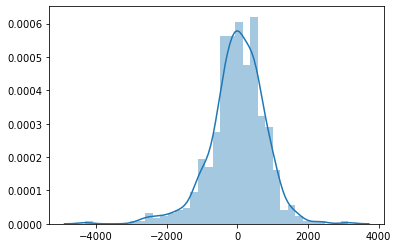

In [629]:
res = y_train - y_train_pred

sns.distplot(res)

##### We see that the mean touched 0 and dist plot is normally distributed. This answers our assumptions regarding errors. So far so good as per the model goes

In [630]:
# Listing down all parameters so that we know which coefficients are high

lr_model.params

const                  2597.484298
temp                   3407.391353
windspeed             -1075.727441
season_Spring         -1059.500511
season_Winter           697.522750
yr_2019                2055.784609
mnth_Dec               -495.172875
mnth_Jan               -372.640416
mnth_Jul               -472.029180
mnth_Nov               -629.665825
mnth_Sep                367.671539
holiday_Yes            -582.439557
weekday_Monday         -258.323775
weekday_Tuesday        -275.577843
weathersit_Weather2    -625.630924
weathersit_Weather3   -2194.119809
dtype: float64

#### Prediction and Evaluation of the model using test set

In [631]:
X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
602,0.740406,0.878788,0.425641,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
660,0.604379,0.666667,0.148749,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
262,0.626185,0.915584,0.232053,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
93,0.640722,0.442857,0.748713,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
510,0.789210,0.761039,0.364071,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [632]:
X_test.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
82,11.685000,80.5833,16.333729,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
272,23.130847,64.7500,13.833825,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,14.110847,80.5833,10.749882,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
648,17.835000,46.3333,12.166932,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
437,23.472500,50.7083,7.709154,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [633]:
# Scaling the test dataset so that we can use our model on the scaled set to predict y

X_test[var] = scaler.transform(X_test[var])
X_test.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Weather2,weathersit_Weather3
82,0.281445,0.837229,0.456418,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
272,0.629300,0.672727,0.379497,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,0.355170,0.837229,0.284606,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
648,0.468352,0.481385,0.328208,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
437,0.639684,0.526839,0.191045,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [634]:
#Keeping only columns which we require though the model development

l = list(X_train_rfe.columns)
l

['temp',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'yr_2019',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Nov',
 'mnth_Sep',
 'holiday_Yes',
 'weekday_Monday',
 'weekday_Tuesday',
 'weathersit_Weather2',
 'weathersit_Weather3']

In [635]:
# Only keeping the necessary variables in the test set

X_test = X_test[l]
X_test.head()

,temp,windspeed,season_Spring,season_Winter,yr_2019,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_Yes,weekday_Monday,weekday_Tuesday,weathersit_Weather2,weathersit_Weather3
82,0.281445,0.456418,0,0,0,0,0,0,0,0,0,0,0,1,0
272,0.629300,0.379497,0,1,0,0,0,0,0,1,0,0,0,0,0
0,0.355170,0.284606,1,0,0,0,1,0,0,0,0,1,0,1,0
648,0.468352,0.328208,0,1,1,0,0,0,0,0,0,0,0,0,0
437,0.639684,0.191045,1,0,1,0,0,0,0,0,0,0,0,0,0


In [636]:
# Predicting y for test data

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.head()

82     2439.863875
272    5398.715540
0      1185.431782
648    6593.587726
437    5567.909157
dtype: float64

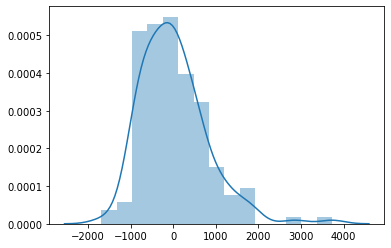

In [637]:
# Checking dist plots for errors of test data
error = y_test_pred - y_test
sns.distplot(error)

##### Now we see that these errors are also normally distributed and the mean also touches 0. This is as expected. Further now we will check the R2 for the test data and compare it with the that of train data.

In [638]:
from sklearn.metrics import r2_score


In [639]:
r2_score(y_test, y_test_pred)

0.8406672548221812

#### Now we see that the R2 of the train data set and test data set are very near. 84% and 83.6%are quite near. This means our model does not over fit the data and as per the modelling we are good